<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/ARIMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("Book12.csv")
df.head()

,year,IP,L
0,1354,18,8
1,1355,25,12
2,1356,26,15
3,1357,27,12
4,1358,21,10


In [ ]:
!pip install pmdarima

In [7]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [8]:
stepwise_fit=auto_arima(df['IP'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1122.211, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1116.013, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1088.164, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=8.000, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=1056.877, Time=0.17 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1067.445, Time=0.30 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=1067.341, Time=0.25 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=10.000, Time=0.12 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 1.872 seconds


In [9]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 2, 1)   Log Likelihood                   0.000
Date:                Sun, 12 Nov 2023   AIC                              8.000
Time:                        12:12:02   BIC                             15.315
Sample:                             0   HQIC                            10.740
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1        1.62e-06         -0       -inf      0.000    1.62e-06    1.62e-06
ar.L2          1.0000         -0       -inf      0.000       1.000       1.000
ma.L1          0.7271         -0       -inf      0.000       0.727       0.727
sigma2      1.861e+08         -0       -inf      0.000    1.86e+08    1.86e+08
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
train=df['IP'].iloc[:-30]
test=df['IP'].iloc[-30:]

In [62]:
model=ARIMA(train,order=(2,2,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     IP   No. Observations:                   18
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -59.021
Date:                Sun, 12 Nov 2023   AIC                            126.041
Time:                        12:49:06   BIC                            129.132
Sample:                             0   HQIC                           126.199
                                 - 18                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2578      0.774      0.333      0.739      -1.259       1.774
ar.L2          0.4355      0.291      1.496      0.135      -0.135       1.006
ma.L1         -0.1568      0.849     -0.185      0.853      -1.820       1.506
sigma2        90.3609     45.294      1.995      0.046       1.586     179.135
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.68   Prob(JB):                         0.85
Heteroskedasticity (H):               2.70   Skew:                            -0.08
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end, type='levels')
print(pred)

18     302.232869
19     387.991019
20     479.789816
21     577.293768
22     678.898946
23     784.045778
24     891.891556
25    1001.975366
26    1113.811415
27    1227.073759
28    1341.466830
29    1456.772492
30    1572.805804
31    1689.424099
32    1806.510064
33    1923.971329
34    2041.732997
35    2159.735536
36    2277.930985
37    2396.281055
38    2514.754990
39    2633.328188
40    2751.980915
41    2870.697369
42    2989.464883
43    3108.273311
44    3227.114522
45    3345.981999
46    3464.870524
47    3583.775913
Name: predicted_mean, dtype: float64


<Axes: >

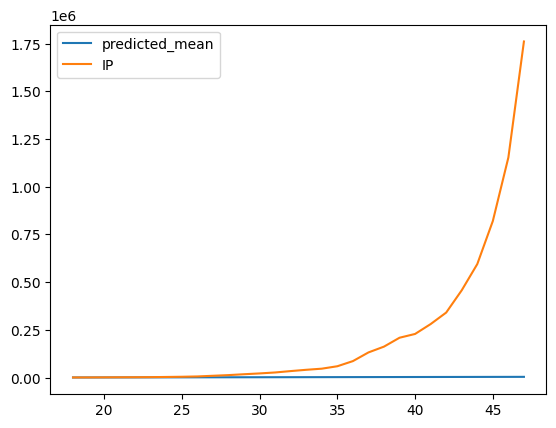

In [79]:
pred.plot(legend=True)
test.plot(legend=True)

In [80]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)

18     302.232869
19     387.991019
20     479.789816
21     577.293768
22     678.898946
23     784.045778
24     891.891556
25    1001.975366
26    1113.811415
27    1227.073759
28    1341.466830
29    1456.772492
30    1572.805804
31    1689.424099
32    1806.510064
33    1923.971329
34    2041.732997
35    2159.735536
36    2277.930985
37    2396.281055
38    2514.754990
39    2633.328188
40    2751.980915
41    2870.697369
42    2989.464883
43    3108.273311
44    3227.114522
45    3345.981999
46    3464.870524
47    3583.775913
Name: predicted_mean, dtype: float64


<Axes: >

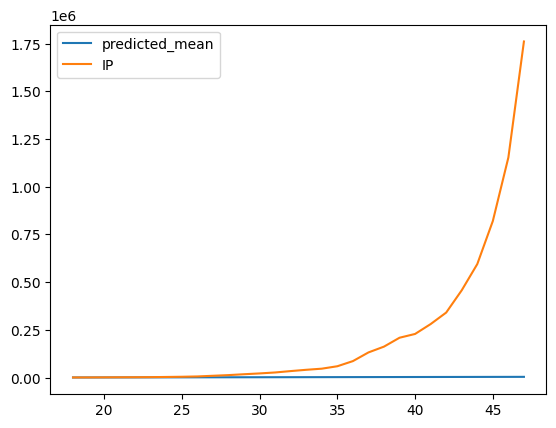

In [64]:
pred.plot(legend=True)
test.plot(legend=True)

In [73]:
test

18        380
19        516
20        887
21       1262
22       1539
23       2014
24       2990
25       4046
26       5731
27       9179
28      12743
29      17318
30      21530
31      26561
32      33824
33      40561
34      46438
35      59161
36      86092
37     131567
38     162056
39     208631
40     228439
41     280185
42     340518
43     457311
44     594653
45     820289
46    1153425
47    1761390
Name: IP, dtype: int64

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

446406.802441199


In [83]:
model2=ARIMA(df['IP'],order=(1,0,5))
model2=model2.fit()
df.tail()

,year,IP,L
43,1397,457311,289118
44,1398,594653,336811
45,1399,820289,439615
46,1400,1153425,652131
47,1401,1761390,1015578


In [85]:
pred=model2.predict(start=len(df['IP'], end=len(df['IP'])+30, type='levels').rename('ARIMA Predictions'))

TypeError: ignored